In [149]:
consumer_token = 'hgEWNdtJZPOn87tzRqQCt3pFC'
consumer_secret = 'ZMmdaDiBBn6Vag6MkPxKZPlxTvdrNagkATdnwpaQp69vlL2dzl'
access_token = '1009226477328523264-QCkesjBFcCu00MSIy3Uba97fE0oGMr'
access_secret = 'ZwVc5uQmX5l58mZAU8JU8e87hEEIevNLhiMe3qplRTZ3u'

In [150]:
import tweepy
import json
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import time

In [151]:
auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [152]:
tweet_df = pd.DataFrame(columns = ["Source Account", "Tweet Text", "Date", "Tweets Ago", "Compound Sentiment", "Positive Sentiment", "Neutral Sentiment", "Negative Sentiment"])

In [153]:
target_user = ["BBCNews", "CBSNews", "CNN", "FoxNews", "nytimes"]
index = 0
avg = []

In [154]:
for user in target_user:
    tweets = api.user_timeline(user, count=100)
    tweet_num = 0
    comp_list = []
    for tweet in tweets:
        search = tweet["text"]
        date = tweet["created_at"]
        comp_sent = analyzer.polarity_scores(search)["compound"]
        comp_list.append(analyzer.polarity_scores(search)["compound"])
        pos_sent = analyzer.polarity_scores(search)["pos"]
        neu_sent = analyzer.polarity_scores(search)["neu"]
        neg_sent = analyzer.polarity_scores(search)["neg"]
        tweet_df.set_value(index, "Source Account", user)
        tweet_df.set_value(index, "Tweet Text", search)
        tweet_df.set_value(index, "Date", date)
        tweet_df.set_value(index, "Tweets Ago", tweet_num)
        tweet_df.set_value(index, "Compound Sentiment", comp_sent)            
        tweet_df.set_value(index, "Positive Sentiment", pos_sent)
        tweet_df.set_value(index, "Neutral Sentiment", neu_sent)
        tweet_df.set_value(index, "Negative Sentiment", neg_sent)
        index += 1
        tweet_num += 1
    avg.append(np.mean([comp_list]))
        

In [155]:
tweet_df.head()

,Source Account,Tweet Text,Date,Tweets Ago,Compound Sentiment,Positive Sentiment,Neutral Sentiment,Negative Sentiment
0,BBCNews,England beat New Zealand by seven wickets to w...,Sun Jul 01 17:52:06 +0000 2018,0,0.5859,0.241,0.759,0
1,BBCNews,Winter Hill fire could last for 'another week'...,Sun Jul 01 17:30:19 +0000 2018,1,-0.34,0,0.806,0.194
2,BBCNews,RT @5liveSport: Russia had never taken part in...,Sun Jul 01 17:05:09 +0000 2018,2,-0.7579,0,0.755,0.245
3,BBCNews,"RT @danroan: EXCLUSIVE \nIn his 1st interview,...",Sun Jul 01 17:03:26 +0000 2018,3,0.7456,0.268,0.732,0
4,BBCNews,Richard Freeman: Bradley Wiggins doctor had 's...,Sun Jul 01 17:03:21 +0000 2018,4,-0.4215,0.19,0.493,0.317


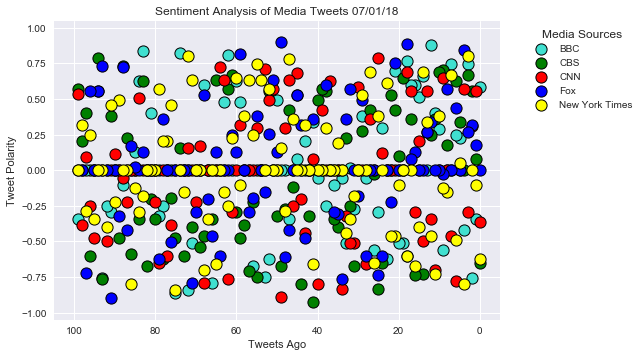

In [156]:
plt.scatter(tweet_df[tweet_df["Source Account"] == "BBCNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "BBCNews"]["Compound Sentiment"], marker="o", c="turquoise", edgecolors="black", linewidth=1 ,s=125, alpha=1, label="BBC")
plt.scatter(tweet_df[tweet_df["Source Account"] == "CBSNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CBSNews"]["Compound Sentiment"], marker="o", facecolors="green", edgecolors="black", linewidth=1, s=125, alpha=1, label="CBS")
plt.scatter(tweet_df[tweet_df["Source Account"] == "CNN"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "CNN"]["Compound Sentiment"], marker="o", facecolors="red", edgecolors="black", linewidth=1,s=125, alpha=1, label="CNN")
plt.scatter(tweet_df[tweet_df["Source Account"] == "FoxNews"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "FoxNews"]["Compound Sentiment"], marker="o", facecolors="blue", edgecolors="black", linewidth=1,s=125, alpha=1, label="Fox")
plt.scatter(tweet_df[tweet_df["Source Account"] == "nytimes"]["Tweets Ago"], tweet_df[tweet_df["Source Account"] == "nytimes"]["Compound Sentiment"], marker="o", facecolors="yellow", edgecolors="black", linewidth=1,s=125, alpha=1, label="New York Times")

plt.title("Sentiment Analysis of Media Tweets " + str(time.strftime("%x")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(title="Media Sources", bbox_to_anchor=(1.05, 1), loc= 2)
plt.ylim(-1.05, 1.05)
plt.xlim(105, -5)
plt.show()

In [169]:
plt.bar(0,avg[0].mean(), color='turquoise', edgecolor='b', width=1)
plt.bar(1, avg[1].mean(), color='green', edgecolor='b', width=1)
plt.bar(2, avg[2].mean(), color='red', edgecolor='b', width=1)
plt.bar(3, avg[3].mean(), color='blue', edgecolor='b', width=1)
plt.bar(4, avg[4].mean(), color='yellow', edgecolor='b', width=1)


plt.title("Overall Media Sentiment Based on Twitter " + str(time.strftime("%x")), fontsize=20)
plt.ylabel("Tweet Polarity")
plt.xlabel

<function matplotlib.pyplot.xlabel>

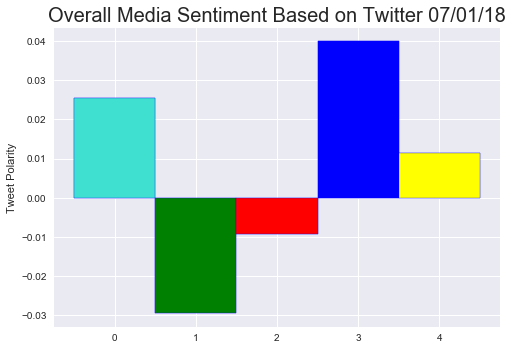

In [170]:
plt.show()